<a href="https://colab.research.google.com/github/QcoJuanDavidMarin/Diplomado/blob/master/reconstruccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias 

In [1]:
import sys
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import cv2
import pathlib

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Input, Reshape, Conv2DTranspose, UpSampling2D

from tensorflow.keras import backend as K

from tensorflow.keras import Model 
import tensorflow as tf 

import os
import zipfile
import tarfile 
from tqdm.notebook import tqdm

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
# Importar optimizadores
from tensorflow.keras.optimizers import Adam, Adamax
# Importar Función de Pérdida
from tensorflow.keras.losses import MeanSquaredError
# Función parar separar datos de entrenamiento y validación
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Ejercicios Diplo IA

/content/drive/MyDrive/Ejercicios Diplo IA


In [4]:
train_cleaned = '/content/drive/MyDrive/Ejercicios Diplo IA/train_cleaned'
train  = '/content/drive/MyDrive/Ejercicios Diplo IA/train'
test = '/content/drive/MyDrive/Ejercicios Diplo IA/test'

In [5]:
# Cargar imagenes limpias 
train_cleaned_path = train_cleaned 
train_cleaned= []
alto = 420
ancho = 540
 
for img in os.listdir(train_cleaned_path):
    img = cv2.imread(os.path.join(train_cleaned_path, img))
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resize = cv2.resize(img_gray,(540, 420))
    
    train_cleaned.append(img_resize)

In [6]:
train_cleaned= np.asarray(train_cleaned, dtype='float32')/255.
train_cleaned=np.expand_dims(train_cleaned, axis=3)
print(train_cleaned.shape)
print(train_cleaned.max())

(144, 420, 540, 1)
1.0


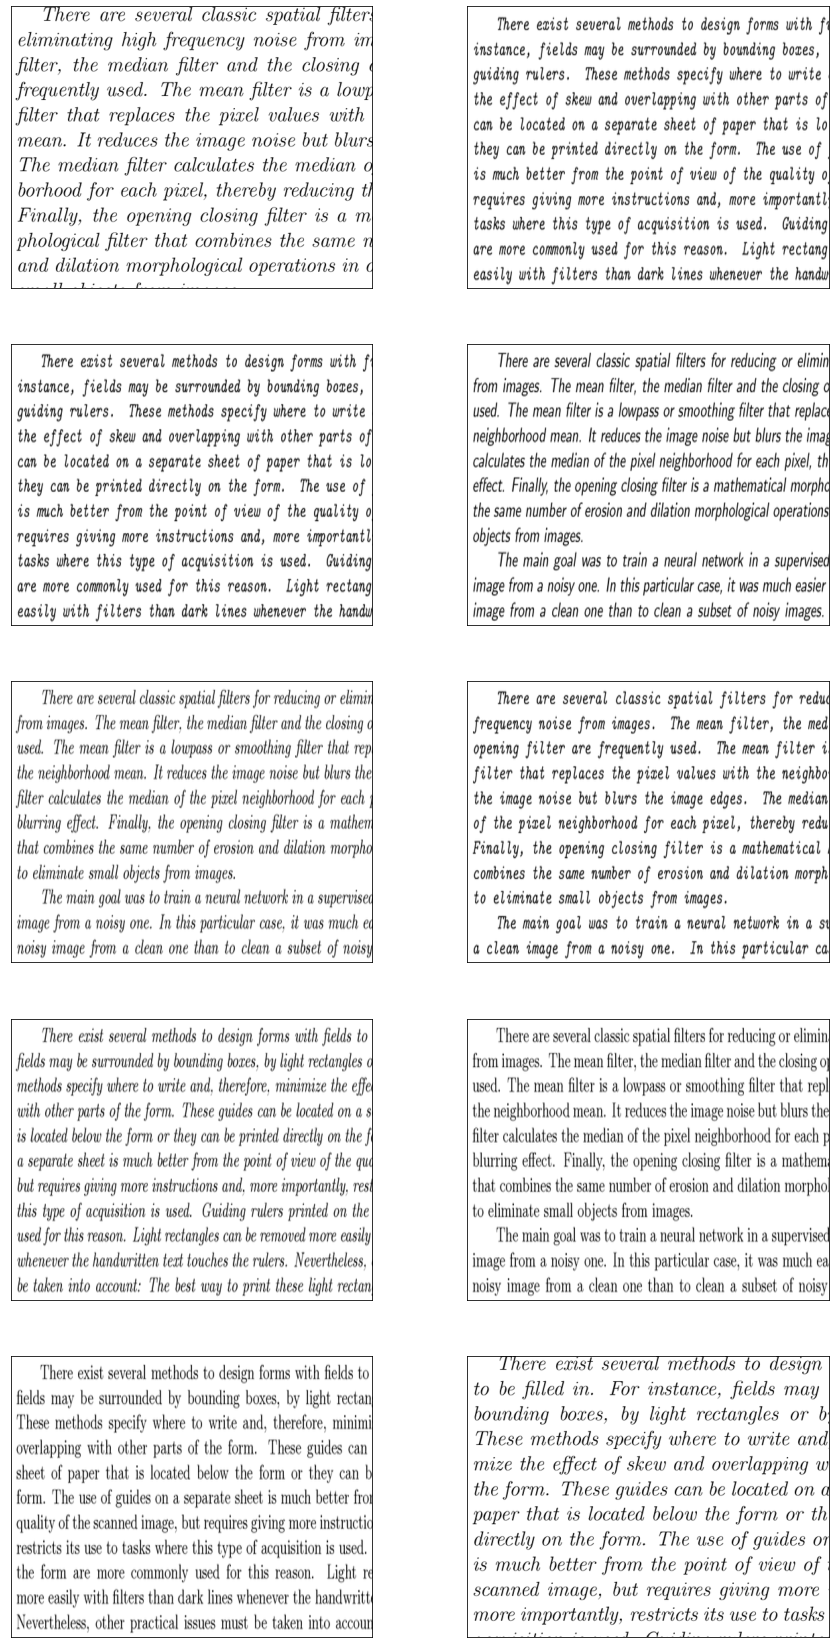

In [ ]:
plt.figure(figsize=(15,30))
numero_muestras = 10
muestras = np.random.randint(0,len(train_cleaned), numero_muestras)

for i in range(numero_muestras):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_cleaned[i][:,:,0], cmap='gray')

plt.show()

In [7]:
# generar imagenes con ruido 
# Función para generar ruido 
def ruido(borrar):
    factor_ruido = 0.4
    array_ruido = borrar + factor_ruido * np.random.normal(
        loc = 0.0, scale = 1, size = borrar.shape
    )
    return np.clip(array_ruido, 0.0,1.0)

In [8]:
train_ruido = ruido(train_cleaned)

In [9]:
print(train_ruido.shape)
print(train_ruido.max())

(144, 420, 540, 1)
1.0


In [10]:
print(len(train_ruido))
print(len(train_cleaned))

144
144


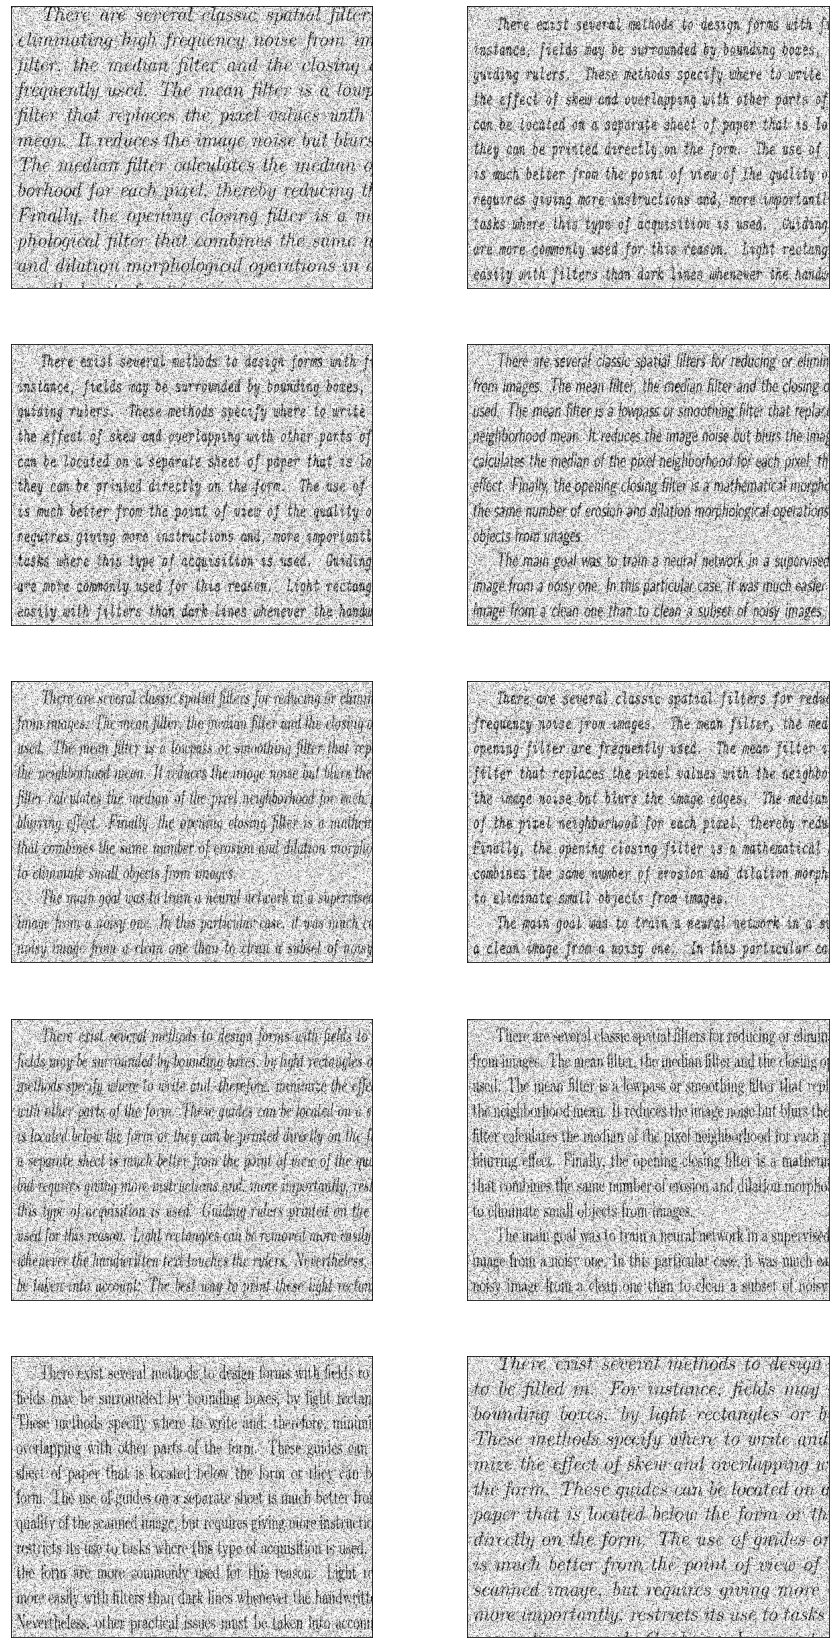

In [11]:
plt.figure(figsize=(15,30))
numero_muestras = 10
muestras = np.random.randint(0,len(train_ruido), numero_muestras)

for i in range(numero_muestras):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_ruido[i][:,:,0], cmap='gray')

plt.show()

# Definir el modelo 

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 540, 420, 1)]     0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 540, 420, 32)      320       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 270, 210, 32)      0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 270, 210, 32)      9248      
_________________________________________________________________
conv2d_transpose_36 (Conv2DT (None, 540, 420, 32)      9248      
_________________________________________________________________
conv2d_transpose_37 (Conv2DT (None, 540, 420, 32)      9248      
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 540, 420, 1)       289

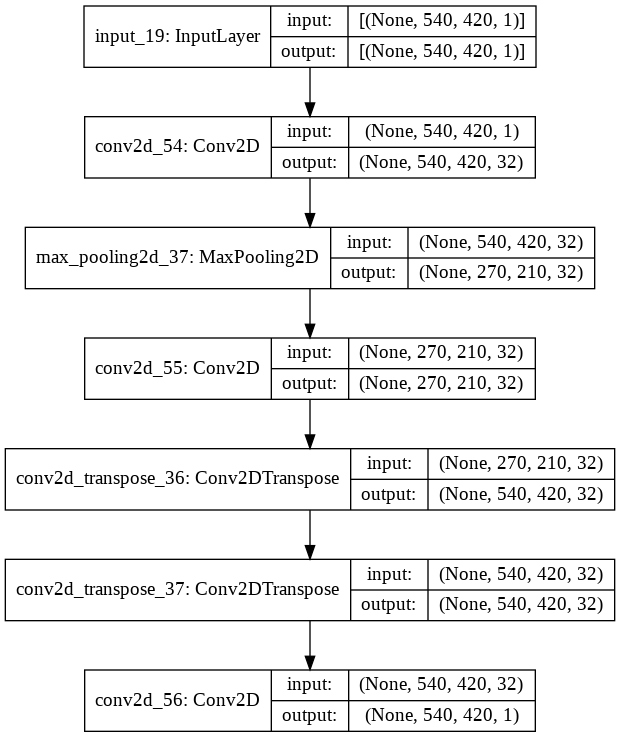

In [ ]:
'''inputs = layers.Input(shape=(ancho,alto, 1))
# Encoder
x = layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same')(inputs)
x = layers.MaxPooling2D((2,2), padding = 'same')(x)
x = layers.Conv2D(32,(3,3), activation='relu', padding = 'same')(x)
#x = layers.MaxPooling2D((2,2), padding = 'same')(x)

# Decoder 
x = layers.Conv2DTranspose(32,(3,3), strides = 2, activation = 'relu', padding = 'same')(x)
#x = layers.MaxPooling2D((2,2), padding = 'same')(x)
x = layers.Conv2DTranspose(32,(3,3), activation = 'relu', padding = 'same')(x)
x = layers.Conv2D(1,(3,3), activation= 'sigmoid', padding = 'same')(x)


# Autoencoders
autoencoder = Model(inputs, x)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()
plot_model(autoencoder,show_shapes=True)'''

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 420, 540, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 210, 270, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 210, 270, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 105, 135, 32)      0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 210, 270, 32)      9248      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 420, 540, 32)      9248

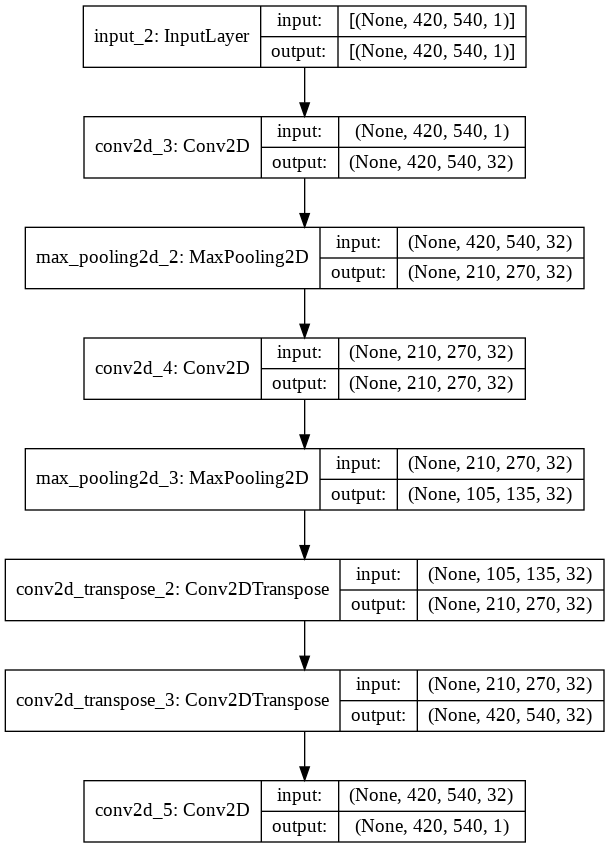

In [29]:
inputs = layers.Input(shape=(alto , ancho, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(inputs)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(inputs, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
autoencoder.summary()
plot_model(autoencoder,show_shapes=True)

In [30]:
X_train,X_test=train_test_split(train_cleaned,test_size=0.1, random_state=42)

# Entrenar Autoencoder

In [31]:
history=autoencoder.fit(
    x=train_cleaned,
    y=train_cleaned,
    epochs=100,
    batch_size=6,
    shuffle=True,
     validation_data=(X_test, X_test))

Epoch 1/100
24/24 [==============================] - 96s 4s/step - loss: 0.5969 - accuracy: 0.5871 - val_loss: 0.3461 - val_accuracy: 0.6769
Epoch 2/100
24/24 [==============================] - 94s 4s/step - loss: 0.3442 - accuracy: 0.6593 - val_loss: 0.3302 - val_accuracy: 0.6769
Epoch 3/100
24/24 [==============================] - 102s 4s/step - loss: 0.3306 - accuracy: 0.6585 - val_loss: 0.2941 - val_accuracy: 0.6769
Epoch 4/100
24/24 [==============================] - 96s 4s/step - loss: 0.2726 - accuracy: 0.6678 - val_loss: 0.2270 - val_accuracy: 0.6769
Epoch 5/100
24/24 [==============================] - 95s 4s/step - loss: 0.2198 - accuracy: 0.6630 - val_loss: 0.2079 - val_accuracy: 0.6769
Epoch 6/100
24/24 [==============================] - 95s 4s/step - loss: 0.2018 - accuracy: 0.6698 - val_loss: 0.1921 - val_accuracy: 0.6801
Epoch 7/100
24/24 [==============================] - 95s 4s/step - loss: 0.1908 - accuracy: 0.6663 - val_loss: 0.1760 - val_accuracy: 0.6906
Epoch 8/100


In [33]:
path = './model_reconstruction'
if not os.path.exists(path):
    os.mkdir(path)
autoencoder.save('./model_reconstruction/model.h5')
autoencoder.save_weights('./model_reconstruction/pesos.h5')   

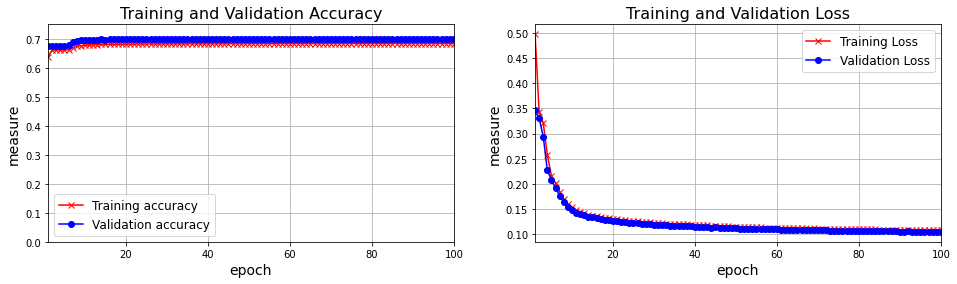

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

n_row = 1
n_col = 2
fig, ax = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(16,4))


ax[0].plot(epochs, acc, 'rx-', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'bo-', label='Validation accuracy')
ax[0].legend(fontsize=12,loc=0)
ax[0].set_title('Training and Validation Accuracy',fontsize=16)
ax[0].set_ylabel('measure',fontsize=14)
ax[0].set_xlabel('epoch', fontsize = 14)
ax[0].set_ylim(0,0.75)
ax[0].grid()
ax[0].set_xlim([1, len(acc)])

ax[1].plot(epochs, loss, 'rx-', label='Training Loss')
ax[1].plot(epochs, val_loss, 'bo-', label='Validation Loss')
ax[1].legend(fontsize=12)
ax[1].set_title('Training and Validation Loss',fontsize=16)
ax[1].set_ylabel('measure',fontsize=14)
ax[1].set_xlabel('epoch', fontsize = 14)
ax[1].set_xlim([1, len(acc)])
ax[1].grid()

plt.show()

# Mostrar Recuperación

In [38]:
predictions = autoencoder.predict(X_test)


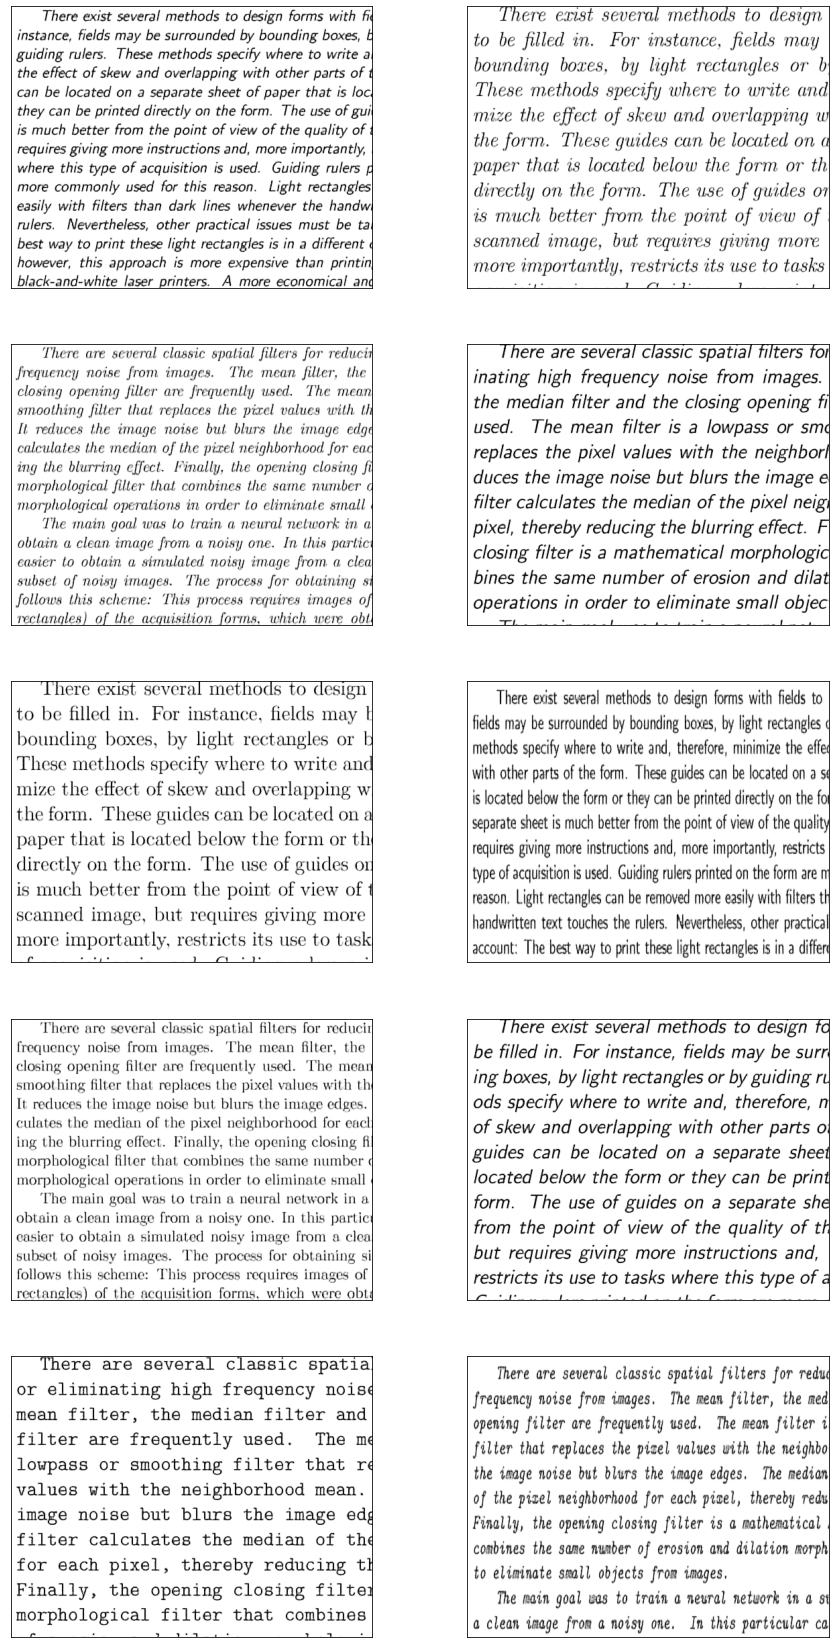

In [39]:
plt.figure(figsize=(15,30))
numero_muestras = 10
muestras = np.random.randint(0,len(predictions), numero_muestras)

for i in range(numero_muestras):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predictions[i][:,:,0], cmap='gray')

plt.show()

# Entrenar Sobre imágenes ruidosas

In [44]:
autoencoder2 = autoencoder

In [46]:
autoencoder2.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [48]:
history=autoencoder2.fit(
    x=train_ruido,
    y=train_cleaned,
    epochs=100,
    batch_size=6,
    shuffle=True,
    validation_data=(X_test, X_test))


path = './model_reconstruction2'
if not os.path.exists(path):
    os.mkdir(path)
autoencoder.save('./model_reconstruction2/model2.h5')
autoencoder.save_weights('./model_reconstruction2/pesos2.h5') 

Epoch 1/100
24/24 [==============================] - 98s 4s/step - loss: 0.1601 - accuracy: 0.6793 - val_loss: 0.1766 - val_accuracy: 0.6991
Epoch 2/100
24/24 [==============================] - 97s 4s/step - loss: 0.1543 - accuracy: 0.6800 - val_loss: 0.1542 - val_accuracy: 0.6998
Epoch 3/100
24/24 [==============================] - 97s 4s/step - loss: 0.1515 - accuracy: 0.6804 - val_loss: 0.1445 - val_accuracy: 0.7001
Epoch 4/100
24/24 [==============================] - 97s 4s/step - loss: 0.1496 - accuracy: 0.6806 - val_loss: 0.1322 - val_accuracy: 0.7004
Epoch 5/100
24/24 [==============================] - 97s 4s/step - loss: 0.1485 - accuracy: 0.6807 - val_loss: 0.1320 - val_accuracy: 0.7004
Epoch 6/100
24/24 [==============================] - 97s 4s/step - loss: 0.1472 - accuracy: 0.6809 - val_loss: 0.1345 - val_accuracy: 0.7004
Epoch 7/100
24/24 [==============================] - 96s 4s/step - loss: 0.1465 - accuracy: 0.6810 - val_loss: 0.1274 - val_accuracy: 0.7004
Epoch 8/100
2

In [1]:
predictions2 = autoencoder2.predict(X_test)


NameError: ignored

In [ ]:
# https://www.kaggle.com/michalbrezk/denoise-images-using-autoencoders-tf-keras#Import-libraries-and-data